<a href="https://colab.research.google.com/github/ombhope/ma22c030_2023_pl/blob/main/Assignment%207/MA22C030PLA7(Predator_PreyMode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp



In [4]:
def predator_prey_model(t, y, alpha, beta, delta, gamma):
    r, x = y
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]



In [5]:
# Set different parameter values
alpha_1 = 1.1
beta_1 = 0.4
delta_1 = 0.1
gamma_1 = 0.1

alpha_2 = 1.2
beta_2 = 0.3
delta_2 = 0.2
gamma_2 = 0.2



In [6]:
# Set initial conditions
r0 = 5
x0 = 2
t_span = (0, 70)
t_eval = np.linspace(*t_span, 1000)



In [7]:
# Solve the system with the first set of parameters
solution_1 = solve_ivp(predator_prey_model, t_span, [r0, x0], args=(alpha_1, beta_1, delta_1, gamma_1), t_eval=t_eval)
r_1, x_1 = solution_1.y



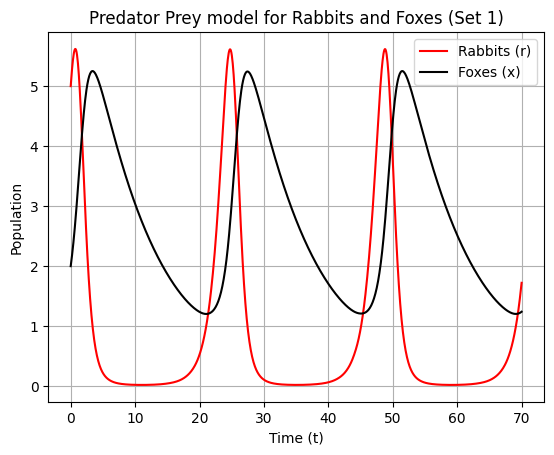

In [8]:
# Plot the results for the first set of parameters
fig = plt.figure()
ax = fig.gca()
ax.plot(t_eval, r_1, label='Rabbits (r)', color="red")
ax.plot(t_eval, x_1, label='Foxes (x)', color="black")
ax.set_xlabel('Time (t)')
ax.set_ylabel('Population')
ax.set_title('Predator Prey model for Rabbits and Foxes (Set 1)')
ax.grid()
ax.legend()
plt.show()



In [9]:
# Solve the system with the second set of parameters
solution_2 = solve_ivp(predator_prey_model, t_span, [r0, x0], args=(alpha_2, beta_2, delta_2, gamma_2), t_eval=t_eval)
r_2, x_2 = solution_2.y



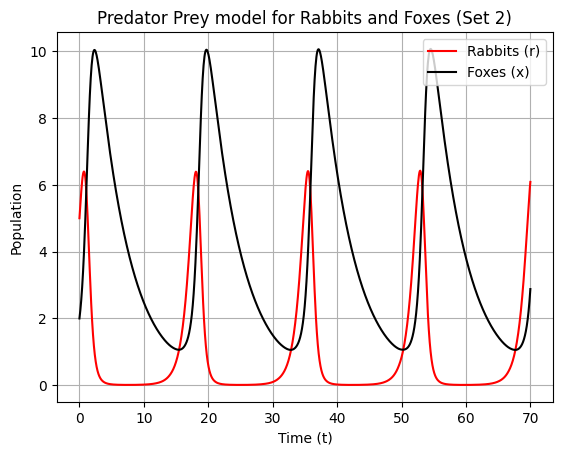

In [10]:
# Plot the results for the second set of parameters
fig = plt.figure()
ax = fig.gca()
ax.plot(t_eval, r_2, label='Rabbits (r)', color="red")
ax.plot(t_eval, x_2, label='Foxes (x)', color="black")
ax.set_xlabel('Time (t)')
ax.set_ylabel('Population')
ax.set_title('Predator Prey model for Rabbits and Foxes (Set 2)')
ax.grid()
ax.legend()
plt.show()




In [15]:
# Set the value of n
n = 10



In [17]:
# Generate random initial conditions
min_r = 1
max_r = 9
min_x = 1
max_x = 9
initial_conditions = np.random.uniform(min_r, max_r, (n, 1)), np.random.uniform(min_x, max_x, (n, 1))
initial_conditions = np.hstack(initial_conditions)  # Converting to numpy array



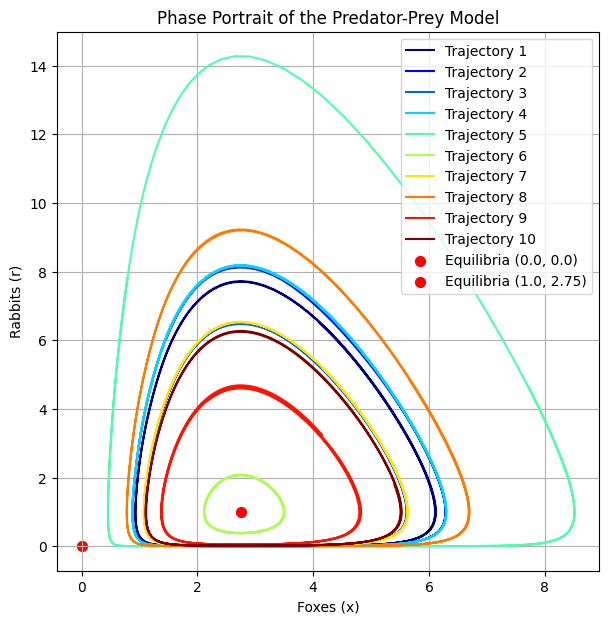

In [18]:
# Plot trajectories and equilibria
colors = plt.cm.jet(np.linspace(0, 1, n))
plt.figure(figsize=(7, 7))
for i in range(n):
    sol = solve_ivp(predator_prey_model, t_span, initial_conditions[i], args=(alpha_1, beta_1, delta_1, gamma_1), t_eval=t_eval)
    plt.plot(sol.y[1], sol.y[0], label=f'Trajectory {i + 1}', color=colors[i])

equilibria = [(0.0, 0.0), (1.0, 2.75)]
for eq in equilibria:
    plt.scatter(eq[1], eq[0], color='red', marker='o', s=50, label=f'Equilibria {eq}')

plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.title('Phase Portrait of the Predator-Prey Model')
plt.legend()
plt.grid()
plt.show()